In [31]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [2]:
!pip install --upgrade matplotlib seaborn numpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.3 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.12.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
dask-cudf 23.12.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
numba 0.57.1+1.gb7ee25572 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [32]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [33]:
train_df = pd.read_csv('../newKDDTrain+.txt', header=None)

columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
train_df.columns = columns

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [34]:
test_df = pd.read_csv('../newKDDTest+.txt', header=None)

test_columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'
]
# Rename the columns of the DataFrame
test_df.columns = columns

test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [35]:
df = pd.concat([train_df, test_df])

In [36]:
df['class']

0         normal
1         normal
2        anomaly
3         normal
4         normal
          ...   
22539     normal
22540     normal
22541    anomaly
22542     normal
22543    anomaly
Name: class, Length: 148517, dtype: object

In [37]:
df.isnull().values.any()

False

In [38]:
len(df.columns)

42

In [39]:
df.shape

(148517, 42)

In [40]:
# 'label' 열의 값이 'normal.'이면 0으로, 'normal.'이 아니면 1로 변경
df['class'] = df['class'].apply(lambda x: 0 if x == 'normal' else 1)

# 변경된 데이터프레임 확인
print(df.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [41]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding 적용
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])

# 인코딩된 데이터프레임 확인
print(df.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.

In [42]:
df.shape

(148517, 42)

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)
X_train.shape, X_test.shape

((133665, 42), (14852, 42))

In [45]:
X_train_normal = X_train[X_train['class'] == 0]
X_train_normal.shape

X_test_normal = X_test[X_test['class'] == 0]
X_test_normal.shape

(7720, 42)

In [46]:
y_train_normal = X_train_normal['class']
X_train_normal = X_train_normal.drop(labels='class',axis=1)

y_test_normal = X_test_normal['class']
X_test_normal = X_test_normal.drop(labels='class',axis=1)

In [59]:
y_train = X_train['class']
y_test = X_test['class']

X_train = X_train.drop(labels='class',axis=1)
X_test = X_test.drop(labels='class',axis=1)

In [53]:
print(X_train_normal.shape)  # 특성 데이터
print(len(y_train_normal))   # 타겟 데이터


(69334, 41)
69334


In [55]:
print(pd.Series(y_train_normal).value_counts())  # 클래스 분포 확인


0    69334
Name: class, dtype: int64


In [60]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# 스케일링
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train_normal)
test_X_scaled = scaler.transform(X_test_normal)

# chi2를 위한 MinMaxScaler
scaler_minmax = MinMaxScaler()
train_X_minmax_scaled = scaler_minmax.fit_transform(X_train)
test_X_minmax_scaled = scaler_minmax.fit_transform(X_test)

# SelectKBest 설정
k = 20  # 선택할 특성 개수 (데이터에 맞게 조정)

# chi2
selector_chi2 = SelectKBest(score_func=chi2, k='all')
X_chi2_selected = selector_chi2.fit(train_X_minmax_scaled, y_train)
chi2_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_chi2_selected.scores_
}).sort_values(by='Score', ascending=False)

# f_classif
selector_f_classif = SelectKBest(score_func=f_classif, k='all')
X_f_classif_selected = selector_f_classif.fit(train_X_minmax_scaled, y_train)
f_classif_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_f_classif_selected.scores_
}).sort_values(by='Score', ascending=False)

# mutual_info_classif
selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k='all')
X_mutual_info_selected = selector_mutual_info.fit(train_X_scaled, y_train_normal)
mutual_info_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_mutual_info_selected.scores_
}).sort_values(by='Score', ascending=False)

# 결과 출력
print("=== Chi2 Scores ===")
print(chi2_scores.head(k))
print("\n=== ANOVA F-scores (f_classif) ===")
print(f_classif_scores.head(k))
print("\n=== Mutual Information Scores ===")
print(mutual_info_scores.head(k))

# 세 결과를 하나의 데이터프레임으로 통합하여 비교
comparison = pd.merge(chi2_scores, f_classif_scores, on='Feature', suffixes=('_chi2', '_f_classif'))
comparison = pd.merge(comparison, mutual_info_scores, on='Feature')
comparison.rename(columns={'Score': 'Score_mutual_info'}, inplace=True)
comparison = comparison.sort_values(by='Score_f_classif', ascending=False)

print("\n=== Feature Selection Comparison ===")
print(comparison)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


=== Chi2 Scores ===
                     Feature         Score
11                 logged_in  35126.471873
38  dst_host_srv_serror_rate  34609.936426
25           srv_serror_rate  33697.628603
24               serror_rate  33608.117543
37      dst_host_serror_rate  33327.719583
32        dst_host_srv_count  26123.264681
33    dst_host_same_srv_rate  22471.253900
28             same_srv_rate  19073.159872
22                     count  11707.595700
27           srv_rerror_rate  10155.260832
26               rerror_rate  10148.177404
40  dst_host_srv_rerror_rate   9839.999880
39      dst_host_rerror_rate   9316.759000
3                       flag   5878.810350
31            dst_host_count   3868.283567
34    dst_host_diff_srv_rate   3632.197537
29             diff_srv_rate   3486.400796
2                    service   1462.557294
30        srv_diff_host_rate   1211.827468
7             wrong_fragment    844.158205

=== ANOVA F-scores (f_classif) ===
                     Feature          Sco

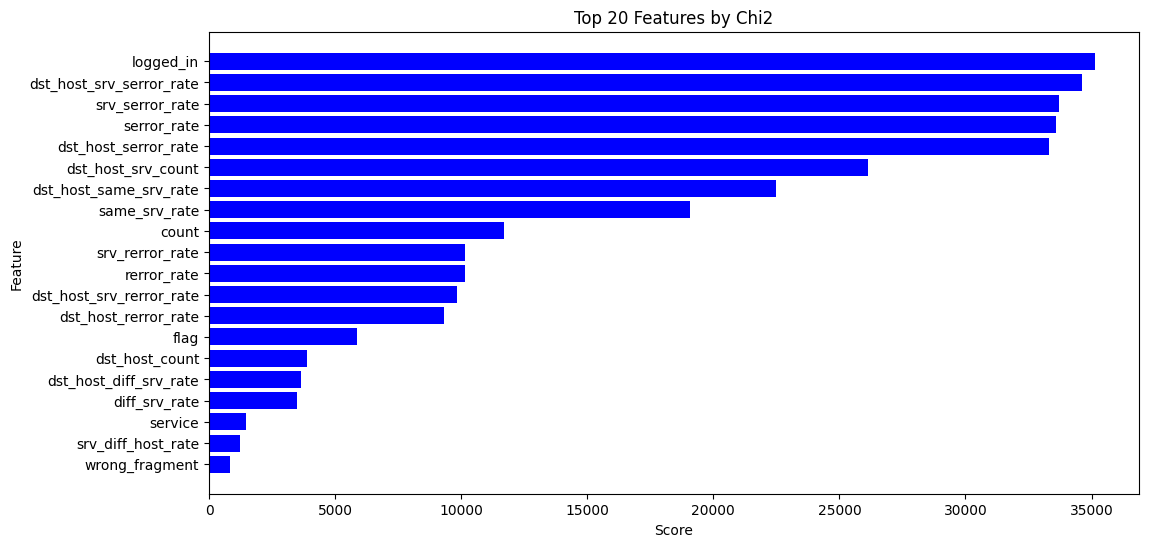

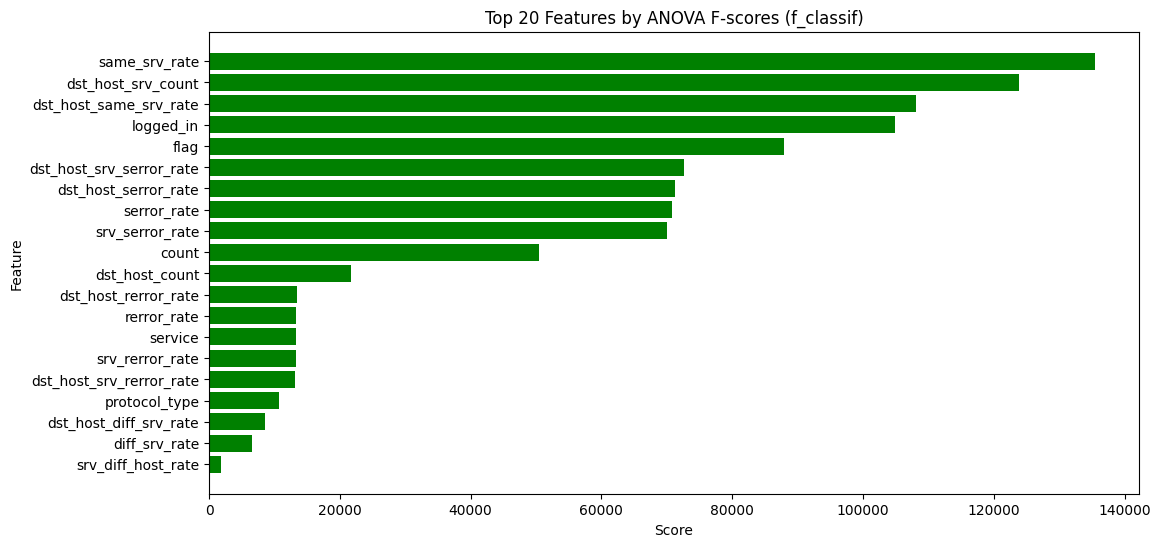

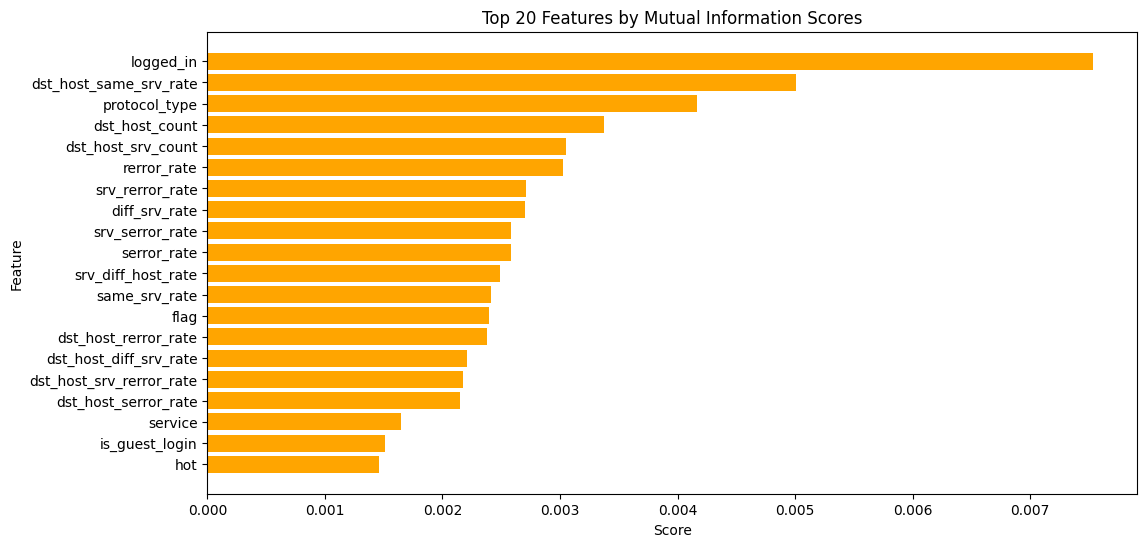

In [62]:
# 시각화
# 상위 k개의 특성 시각화
def plot_feature_scores(df, method, color):
    plt.figure(figsize=(12, 6))
    plt.barh(df['Feature'].head(k), df['Score'].head(k), color=color)
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title(f'Top {k} Features by {method}')
    plt.gca().invert_yaxis()
    plt.show()

# Chi2
plot_feature_scores(chi2_scores, 'Chi2', 'blue')

# ANOVA F-scores (f_classif)
plot_feature_scores(f_classif_scores, 'ANOVA F-scores (f_classif)', 'green')

# Mutual Information Scores
plot_feature_scores(mutual_info_scores, 'Mutual Information Scores', 'orange')


In [63]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# 스케일링
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train_normal)
test_X_scaled = scaler.transform(X_test_normal)

# chi2를 위한 MinMaxScaler
scaler_minmax = MinMaxScaler()
train_X_minmax_scaled = scaler_minmax.fit_transform(X_train)
test_X_minmax_scaled = scaler_minmax.fit_transform(X_test)

# SelectKBest 설정
k = 19  # 선택할 특성 개수 (데이터에 맞게 조정)

# chi2
selector_chi2 = SelectKBest(score_func=chi2, k='all')
X_chi2_selected = selector_chi2.fit(train_X_minmax_scaled, y_train)
chi2_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_chi2_selected.scores_
}).sort_values(by='Score', ascending=False)

# f_classif
selector_f_classif = SelectKBest(score_func=f_classif, k='all')
X_f_classif_selected = selector_f_classif.fit(train_X_minmax_scaled, y_train)
f_classif_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_f_classif_selected.scores_
}).sort_values(by='Score', ascending=False)

# mutual_info_classif
selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k='all')
X_mutual_info_selected = selector_mutual_info.fit(train_X_scaled, y_train_normal)
mutual_info_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_mutual_info_selected.scores_
}).sort_values(by='Score', ascending=False)

# 결과 출력
print("=== Chi2 Scores ===")
print(chi2_scores.head(k))
print("\n=== ANOVA F-scores (f_classif) ===")
print(f_classif_scores.head(k))
print("\n=== Mutual Information Scores ===")
print(mutual_info_scores.head(k))

# 세 결과를 하나의 데이터프레임으로 통합하여 비교
comparison = pd.merge(chi2_scores, f_classif_scores, on='Feature', suffixes=('_chi2', '_f_classif'))
comparison = pd.merge(comparison, mutual_info_scores, on='Feature')
comparison.rename(columns={'Score': 'Score_mutual_info'}, inplace=True)
comparison = comparison.sort_values(by='Score_f_classif', ascending=False)

print("\n=== Feature Selection Comparison ===")
print(comparison)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


=== Chi2 Scores ===
                     Feature         Score
11                 logged_in  35126.471873
38  dst_host_srv_serror_rate  34609.936426
25           srv_serror_rate  33697.628603
24               serror_rate  33608.117543
37      dst_host_serror_rate  33327.719583
32        dst_host_srv_count  26123.264681
33    dst_host_same_srv_rate  22471.253900
28             same_srv_rate  19073.159872
22                     count  11707.595700
27           srv_rerror_rate  10155.260832
26               rerror_rate  10148.177404
40  dst_host_srv_rerror_rate   9839.999880
39      dst_host_rerror_rate   9316.759000
3                       flag   5878.810350
31            dst_host_count   3868.283567
34    dst_host_diff_srv_rate   3632.197537
29             diff_srv_rate   3486.400796
2                    service   1462.557294
30        srv_diff_host_rate   1211.827468

=== ANOVA F-scores (f_classif) ===
                     Feature          Score
28             same_srv_rate  135445.975

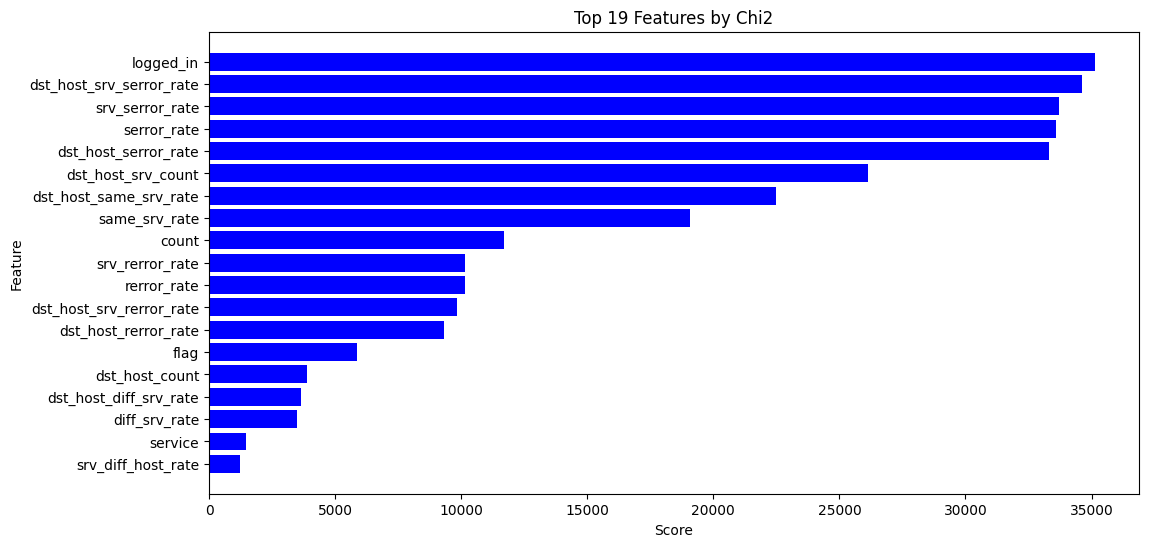

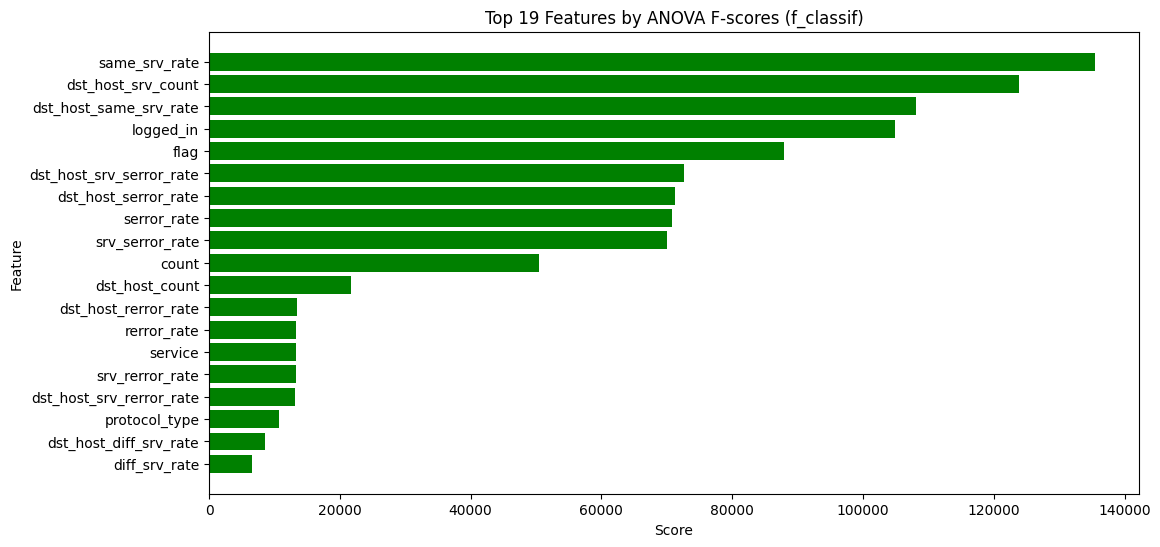

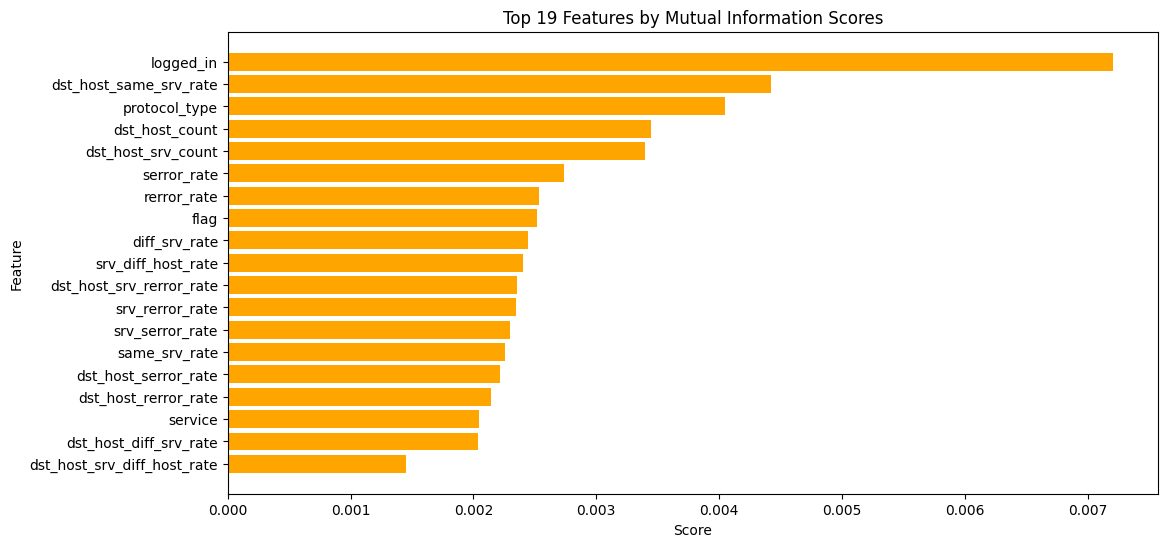

In [64]:
# 시각화
# 상위 k개의 특성 시각화
def plot_feature_scores(df, method, color):
    plt.figure(figsize=(12, 6))
    plt.barh(df['Feature'].head(k), df['Score'].head(k), color=color)
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title(f'Top {k} Features by {method}')
    plt.gca().invert_yaxis()
    plt.show()

# Chi2
plot_feature_scores(chi2_scores, 'Chi2', 'blue')

# ANOVA F-scores (f_classif)
plot_feature_scores(f_classif_scores, 'ANOVA F-scores (f_classif)', 'green')

# Mutual Information Scores
plot_feature_scores(mutual_info_scores, 'Mutual Information Scores', 'orange')


In [65]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# 스케일링
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train_normal)
test_X_scaled = scaler.transform(X_test_normal)

# chi2를 위한 MinMaxScaler
scaler_minmax = MinMaxScaler()
train_X_minmax_scaled = scaler_minmax.fit_transform(X_train)
test_X_minmax_scaled = scaler_minmax.fit_transform(X_test)

# SelectKBest 설정
k = 21  # 선택할 특성 개수 (데이터에 맞게 조정)

# chi2
selector_chi2 = SelectKBest(score_func=chi2, k='all')
X_chi2_selected = selector_chi2.fit(train_X_minmax_scaled, y_train)
chi2_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_chi2_selected.scores_
}).sort_values(by='Score', ascending=False)

# f_classif
selector_f_classif = SelectKBest(score_func=f_classif, k='all')
X_f_classif_selected = selector_f_classif.fit(train_X_minmax_scaled, y_train)
f_classif_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_f_classif_selected.scores_
}).sort_values(by='Score', ascending=False)

# mutual_info_classif
selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k='all')
X_mutual_info_selected = selector_mutual_info.fit(train_X_scaled, y_train_normal)
mutual_info_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_mutual_info_selected.scores_
}).sort_values(by='Score', ascending=False)

# 결과 출력
print("=== Chi2 Scores ===")
print(chi2_scores.head(k))
print("\n=== ANOVA F-scores (f_classif) ===")
print(f_classif_scores.head(k))
print("\n=== Mutual Information Scores ===")
print(mutual_info_scores.head(k))

# 세 결과를 하나의 데이터프레임으로 통합하여 비교
comparison = pd.merge(chi2_scores, f_classif_scores, on='Feature', suffixes=('_chi2', '_f_classif'))
comparison = pd.merge(comparison, mutual_info_scores, on='Feature')
comparison.rename(columns={'Score': 'Score_mutual_info'}, inplace=True)
comparison = comparison.sort_values(by='Score_f_classif', ascending=False)

print("\n=== Feature Selection Comparison ===")
print(comparison)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


=== Chi2 Scores ===
                     Feature         Score
11                 logged_in  35126.471873
38  dst_host_srv_serror_rate  34609.936426
25           srv_serror_rate  33697.628603
24               serror_rate  33608.117543
37      dst_host_serror_rate  33327.719583
32        dst_host_srv_count  26123.264681
33    dst_host_same_srv_rate  22471.253900
28             same_srv_rate  19073.159872
22                     count  11707.595700
27           srv_rerror_rate  10155.260832
26               rerror_rate  10148.177404
40  dst_host_srv_rerror_rate   9839.999880
39      dst_host_rerror_rate   9316.759000
3                       flag   5878.810350
31            dst_host_count   3868.283567
34    dst_host_diff_srv_rate   3632.197537
29             diff_srv_rate   3486.400796
2                    service   1462.557294
30        srv_diff_host_rate   1211.827468
7             wrong_fragment    844.158205
1              protocol_type    834.326449

=== ANOVA F-scores (f_classif) ==

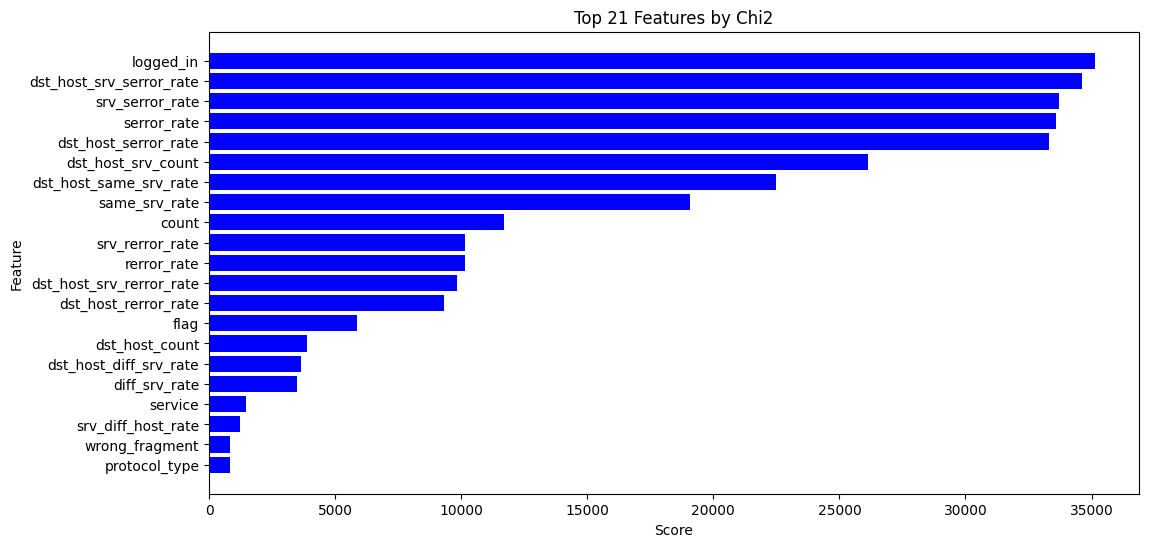

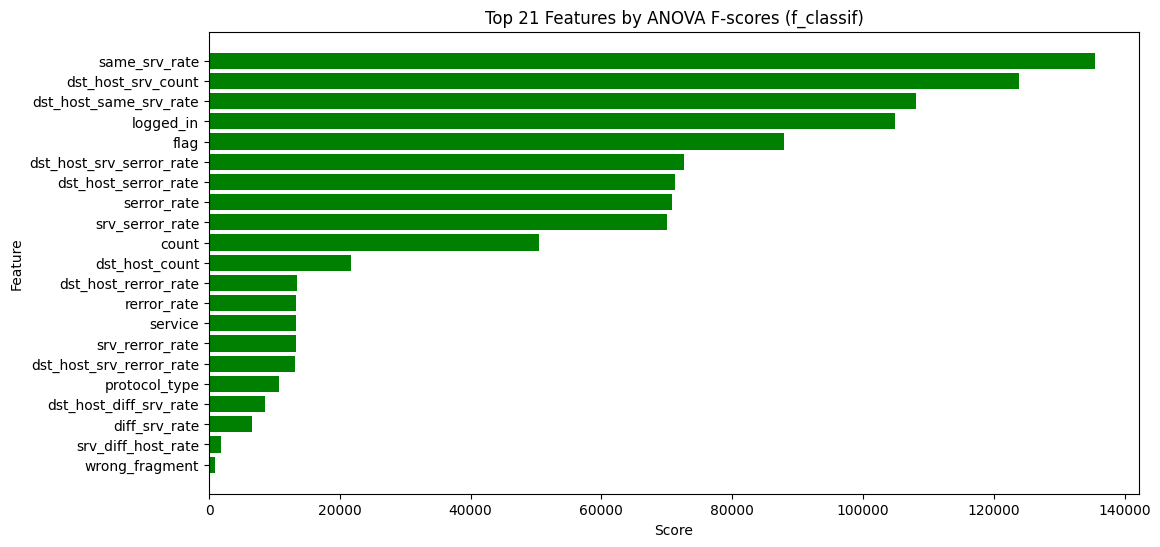

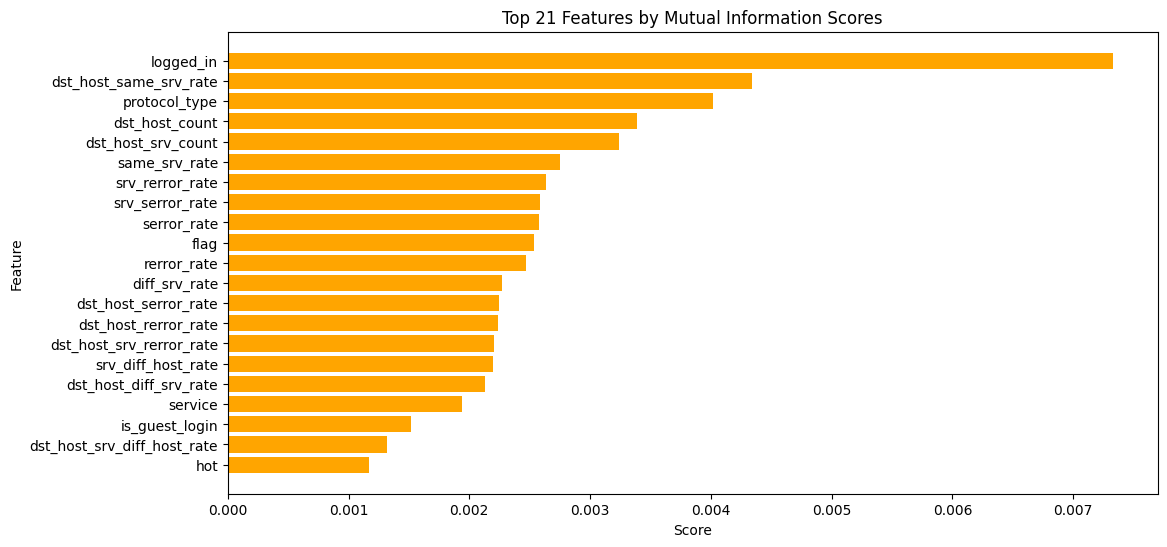

In [66]:
# 시각화
# 상위 k개의 특성 시각화
def plot_feature_scores(df, method, color):
    plt.figure(figsize=(12, 6))
    plt.barh(df['Feature'].head(k), df['Score'].head(k), color=color)
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title(f'Top {k} Features by {method}')
    plt.gca().invert_yaxis()
    plt.show()

# Chi2
plot_feature_scores(chi2_scores, 'Chi2', 'blue')

# ANOVA F-scores (f_classif)
plot_feature_scores(f_classif_scores, 'ANOVA F-scores (f_classif)', 'green')

# Mutual Information Scores
plot_feature_scores(mutual_info_scores, 'Mutual Information Scores', 'orange')


In [67]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# 스케일링
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train_normal)
test_X_scaled = scaler.transform(X_test_normal)

# chi2를 위한 MinMaxScaler
scaler_minmax = MinMaxScaler()
train_X_minmax_scaled = scaler_minmax.fit_transform(X_train)
test_X_minmax_scaled = scaler_minmax.fit_transform(X_test)

# SelectKBest 설정
k = 15  # 선택할 특성 개수 (데이터에 맞게 조정)

# chi2
selector_chi2 = SelectKBest(score_func=chi2, k='all')
X_chi2_selected = selector_chi2.fit(train_X_minmax_scaled, y_train)
chi2_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_chi2_selected.scores_
}).sort_values(by='Score', ascending=False)

# f_classif
selector_f_classif = SelectKBest(score_func=f_classif, k='all')
X_f_classif_selected = selector_f_classif.fit(train_X_minmax_scaled, y_train)
f_classif_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_f_classif_selected.scores_
}).sort_values(by='Score', ascending=False)

# mutual_info_classif
selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k='all')
X_mutual_info_selected = selector_mutual_info.fit(train_X_scaled, y_train_normal)
mutual_info_scores = pd.DataFrame({
    'Feature': X_train_normal.columns,
    'Score': X_mutual_info_selected.scores_
}).sort_values(by='Score', ascending=False)

# 결과 출력
print("=== Chi2 Scores ===")
print(chi2_scores.head(k))
print("\n=== ANOVA F-scores (f_classif) ===")
print(f_classif_scores.head(k))
print("\n=== Mutual Information Scores ===")
print(mutual_info_scores.head(k))

# 세 결과를 하나의 데이터프레임으로 통합하여 비교
comparison = pd.merge(chi2_scores, f_classif_scores, on='Feature', suffixes=('_chi2', '_f_classif'))
comparison = pd.merge(comparison, mutual_info_scores, on='Feature')
comparison.rename(columns={'Score': 'Score_mutual_info'}, inplace=True)
comparison = comparison.sort_values(by='Score_f_classif', ascending=False)

print("\n=== Feature Selection Comparison ===")
print(comparison)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


=== Chi2 Scores ===
                     Feature         Score
11                 logged_in  35126.471873
38  dst_host_srv_serror_rate  34609.936426
25           srv_serror_rate  33697.628603
24               serror_rate  33608.117543
37      dst_host_serror_rate  33327.719583
32        dst_host_srv_count  26123.264681
33    dst_host_same_srv_rate  22471.253900
28             same_srv_rate  19073.159872
22                     count  11707.595700
27           srv_rerror_rate  10155.260832
26               rerror_rate  10148.177404
40  dst_host_srv_rerror_rate   9839.999880
39      dst_host_rerror_rate   9316.759000
3                       flag   5878.810350
31            dst_host_count   3868.283567

=== ANOVA F-scores (f_classif) ===
                     Feature          Score
28             same_srv_rate  135445.975556
32        dst_host_srv_count  123935.162007
33    dst_host_same_srv_rate  108170.241641
11                 logged_in  104950.245505
3                       flag   87966

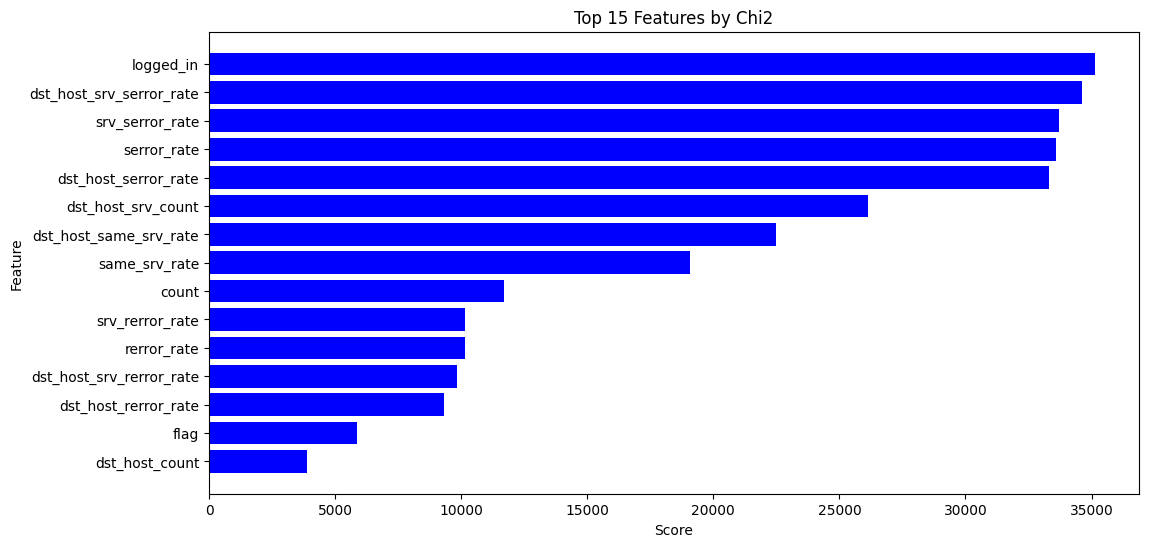

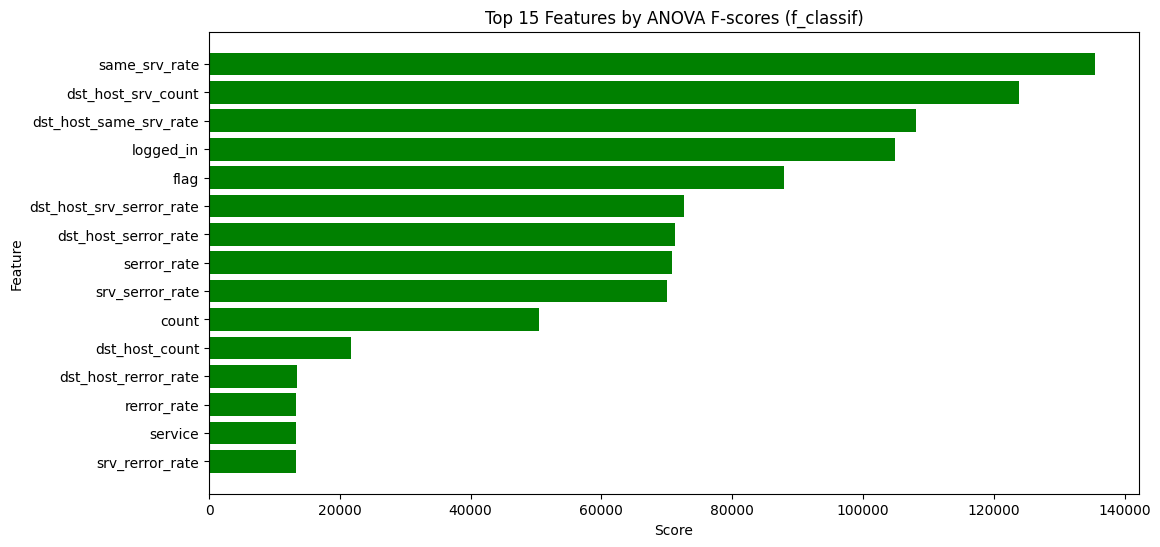

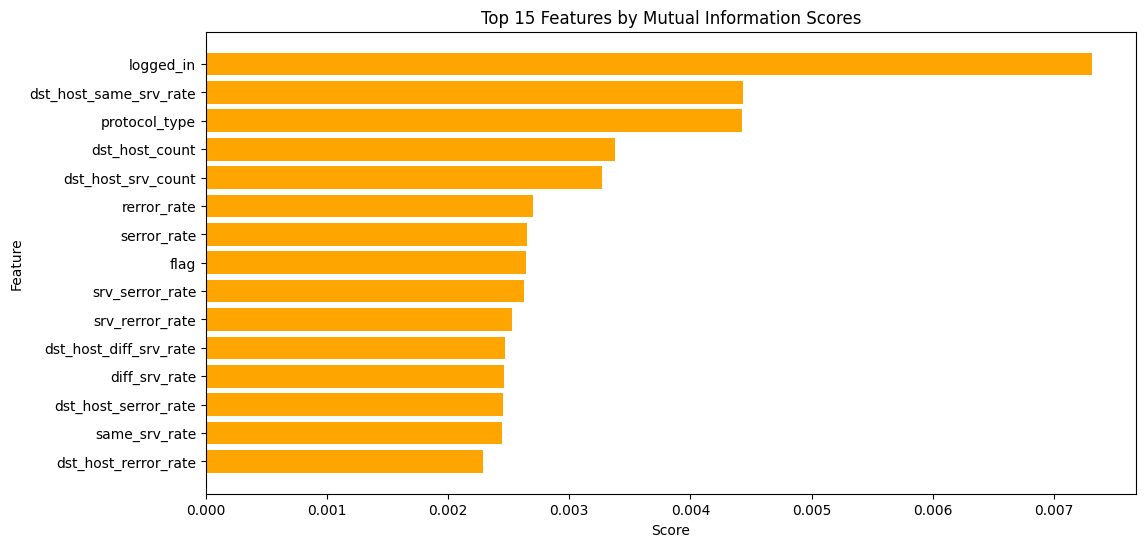

In [68]:
# 시각화
# 상위 k개의 특성 시각화
def plot_feature_scores(df, method, color):
    plt.figure(figsize=(12, 6))
    plt.barh(df['Feature'].head(k), df['Score'].head(k), color=color)
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title(f'Top {k} Features by {method}')
    plt.gca().invert_yaxis()
    plt.show()

# Chi2
plot_feature_scores(chi2_scores, 'Chi2', 'blue')

# ANOVA F-scores (f_classif)
plot_feature_scores(f_classif_scores, 'ANOVA F-scores (f_classif)', 'green')

# Mutual Information Scores
plot_feature_scores(mutual_info_scores, 'Mutual Information Scores', 'orange')


# 기존에 진행했던 PCA
PCA로 주성분 15개 뽑고 SelectKBest 진행

In [69]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import pandas as pd

# StandardScaler와 PCA 진행은 동일
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train_normal)
#test_X_scaled = scaler.transform(X_test_normal)

# PCA 수행
num_components = 15  # 20개의 주성분 사용
pca = PCA(n_components=num_components)
train_X_pca = pca.fit_transform(train_X_scaled)
#test_X_pca = pca.transform(test_X_scaled)

# SelectKBest로 상위 20개의 특성 선택
feature_selector = SelectKBest(score_func=f_classif, k=15)
train_X_selected = feature_selector.fit_transform(train_X_pca, y_train_normal)
#test_X_selected = feature_selector.transform(test_X_pca)

# 원래 특성 이름 (train_X_scaled.shape[1]에 맞게 조정)
original_feature_names = X_train_normal.columns[:train_X_scaled.shape[1]]

# PCA 주성분에 대한 각 원래 특성의 기여도 (loading)
loading_matrix = pd.DataFrame(pca.components_.T, 
                              columns=[f'PC{i}' for i in range(num_components)], 
                              index=original_feature_names)

# 상위 K개의 주성분이 선택된 특성의 기여도를 확인
selected_pca_features = feature_selector.get_support(indices=True)
selected_pca_loading = loading_matrix.iloc[:, selected_pca_features]

print("PCA Components Loading Matrix for Selected Features:")
print(selected_pca_loading)

PCA Components Loading Matrix for Selected Features:
                                  PC0       PC1       PC2           PC3  \
duration                     0.028592  0.236499 -0.057188  1.097340e-01   
protocol_type               -0.065425 -0.003982 -0.441464  9.466351e-02   
service                      0.003370  0.259840  0.118372 -7.205543e-02   
flag                        -0.430063  0.041850  0.035631 -2.404074e-02   
src_bytes                   -0.001693  0.026100  0.009671  1.462904e-02   
dst_bytes                   -0.002590  0.048927  0.044789  1.086818e-01   
land                         0.010131  0.020493  0.015987  4.971750e-03   
wrong_fragment               0.000064  0.016656 -0.019793 -4.084171e-03   
urgent                       0.000435  0.019567  0.009794  3.759643e-02   
hot                         -0.008899  0.084488  0.036591 -5.392221e-02   
num_failed_logins            0.004985  0.037279  0.008653  2.250191e-02   
logged_in                   -0.129380 -0.087306

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [70]:
# 선택된 PCA 주성분에 기여한 원래 특성의 column명 가져오기
selected_feature_names = original_feature_names[selected_pca_features]

# 선택된 column명 출력
print("Selected Feature Names:")
print(selected_feature_names)

Selected Feature Names:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted'],
      dtype='object')


이 코드는 PCA를 먼저 적용한 후 SelectKBest를 수행합니다. 즉:

PCA 적용:

원래 특성 공간(예: 41개의 특성)을 줄여 num_components=15개의 주성분으로 변환.
각 주성분(Principal Component, PC)은 원래 특성들의 선형 결합.
SelectKBest 사용:

PCA로 변환된 주성분을 입력 데이터로 간주하고, f_classif를 사용해 상위 15개의 주성분(PC)을 선택.
여기서 SelectKBest는 주성분에 대해 작동하며, 선택된 주성분에 가장 크게 기여한 원래 특성을 역으로 추적합니다.

일반적인 SelectKBest는 원래 특성에 대한 중요도를 직접 평가합니다.
이 코드는 PCA로 생성된 주성분을 기반으로 상위 주성분에 가장 많이 기여한 원래 특성을 간접적으로 선택합니다.

이 방법은 PCA를 활용한 특성 선택 방식으로 간주할 수 있습니다.
PCA의 목적은 데이터를 축소하면서 정보 손실을 최소화하는 것이므로, 선택된 특성이 실제 데이터의 분산을 잘 설명할 가능성이 높습니다.
하지만, PCA 적용으로 인해 선택된 특성의 해석력이 떨어질 수 있습니다(주성분은 원래 특성의 조합이기 때문).


In [74]:
# 선택된 원래 특성의 이름
selected_feature_names = original_feature_names[selected_pca_features]
print("Selected Features:")
print(selected_feature_names)

# 선택된 컬럼들의 데이터 추출
X_selected = X_train[selected_feature_names]

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_selected_scaled = scaler.fit_transform(X_selected)


# chi2 점수 계산
selector_chi2 = SelectKBest(score_func=chi2, k='all')
selector_chi2.fit(X_selected, y_train)
chi2_scores = pd.DataFrame({
    'Feature': selected_feature_names,
    'Score': selector_chi2.scores_
}).sort_values(by='Score', ascending=False)

# f_classif 점수 계산
selector_f_classif = SelectKBest(score_func=f_classif, k='all')
selector_f_classif.fit(X_selected, y_train)
f_classif_scores = pd.DataFrame({
    'Feature': selected_feature_names,
    'Score': selector_f_classif.scores_
}).sort_values(by='Score', ascending=False)


X_selected = X_train_normal[selected_feature_names]
# mutual_info_classif 점수 계산
selector_mutual_info = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mutual_info.fit(X_selected, y_train_normal)
mutual_info_scores = pd.DataFrame({
    'Feature': selected_feature_names,
    'Score': selector_mutual_info.scores_
}).sort_values(by='Score', ascending=False)

# 결과 출력
print("=== Chi2 Scores ===")
print(chi2_scores)
print("\n=== ANOVA F-scores (f_classif) ===")
print(f_classif_scores)
print("\n=== Mutual Information Scores ===")
print(mutual_info_scores)


Selected Features:
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted'],
      dtype='object')
=== Chi2 Scores ===
              Feature         Score
4           src_bytes  3.353047e+09
5           dst_bytes  1.587075e+09
0            duration  8.380001e+06
2             service  1.009165e+05
3                flag  5.878810e+04
11          logged_in  3.512647e+04
12    num_compromised  2.433675e+04
7      wrong_fragment  2.532475e+03
1       protocol_type  1.668653e+03
10  num_failed_logins  2.953443e+02
9                 hot  2.734014e+02
14       su_attempted  1.037632e+02
13         root_shell  2.268404e+01
6                land  6.941653e+00
8              urgent  4.365359e+00

=== ANOVA F-scores (f_classif) ===
              Feature          Score
11          logged_in  104950.245505
3                flag   

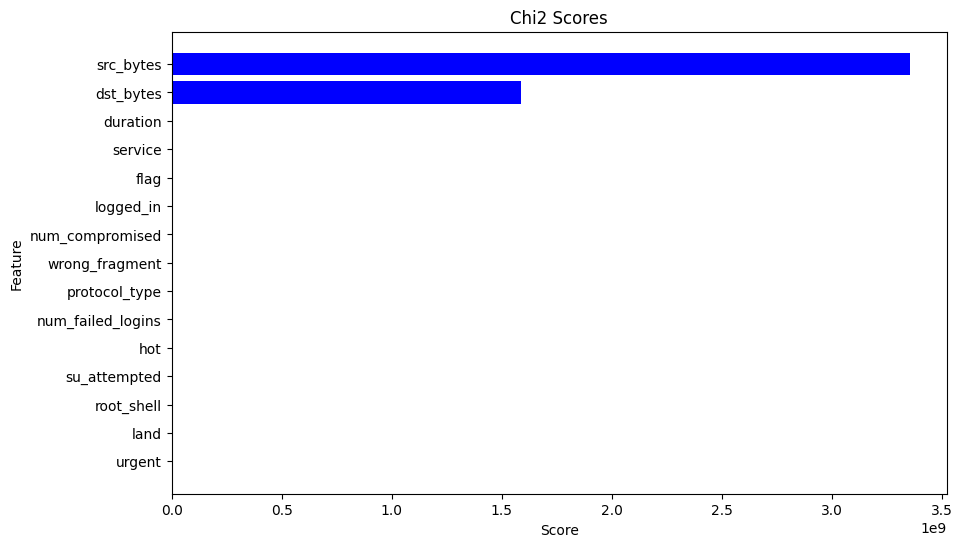

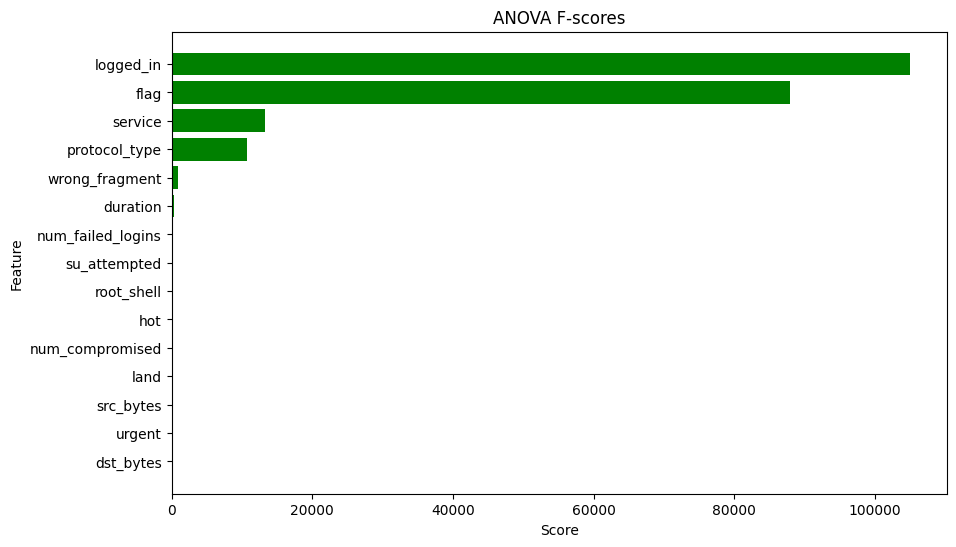

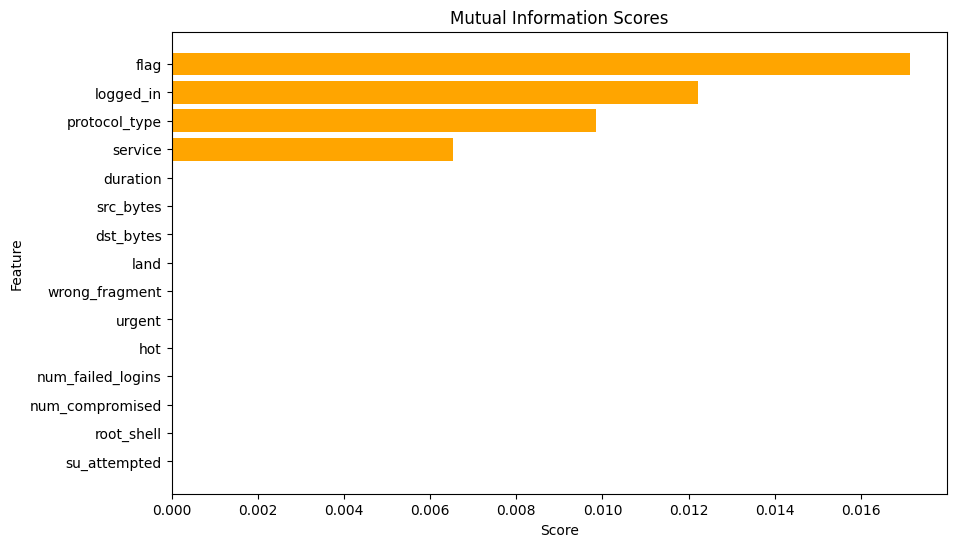

In [75]:
import matplotlib.pyplot as plt

def plot_scores(scores_df, title, color):
    plt.figure(figsize=(10, 6))
    plt.barh(scores_df['Feature'], scores_df['Score'], color=color)
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# 시각화
plot_scores(chi2_scores, 'Chi2 Scores', 'blue')
plot_scores(f_classif_scores, 'ANOVA F-scores', 'green')
plot_scores(mutual_info_scores, 'Mutual Information Scores', 'orange')
